In [1]:
import pandas as pd

In [5]:
shap_value = pd.read_csv("../model_evaluation/shap_values_with_features.csv")

columns=["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope","AgeBin","HighCholesterol","StressScore","BPxChol","FBSxOldpeak"]

In [3]:
shap_value

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,SHAP_Feature_17,SHAP_Feature_18,SHAP_Feature_19,SHAP_Feature_20,SHAP_Feature_21,SHAP_Feature_22,SHAP_Feature_23,SHAP_Feature_24,SHAP_Feature_25,SHAP_Feature_26
0,-1.234500,-1.233977,0.822940,-0.526051,1.243009,-0.770450,1.296097,-0.728121,0.350297,-0.322106,...,0.020900,-0.002124,-0.446548,-0.323904,-0.001786,2.338669,1.355241,-0.014306,-0.011178,-0.009236
1,0.984866,1.577282,0.498958,1.900957,-1.101616,2.157043,1.296097,2.743746,0.939751,4.717400,...,-0.064093,-0.573909,0.876179,0.607814,-0.010787,1.769745,0.697893,0.000228,0.003449,-0.009772
2,-0.494711,-1.796228,-0.380423,-0.526051,-1.404149,-0.770450,-0.771547,-0.728121,-0.708054,-0.322106,...,-0.025886,-0.005698,-0.425769,-0.362138,-0.013808,-1.795221,-1.143961,-0.022854,-0.019969,0.003344
3,1.513287,0.565229,0.647064,1.900957,-0.458735,1.669127,1.296097,1.725951,0.786559,3.877483,...,0.054718,0.006850,-0.627386,-0.486599,0.014519,-1.633594,-1.057328,0.006764,0.080737,0.002809
4,-0.811763,-0.109473,0.313825,-0.526051,1.432092,-0.184951,-0.771547,-0.449131,0.259049,-0.322106,...,-0.053818,-0.037073,-0.408591,-0.365884,-0.000470,1.296145,1.243230,0.001827,0.005081,0.000761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1.090551,1.015031,0.212002,-0.526051,-0.836901,-0.770450,-0.771547,-0.728121,0.460861,-0.322106,...,0.037589,0.078691,-0.748918,-0.488237,0.007891,2.663940,1.325871,0.064395,0.044945,-0.009772
199,0.562130,-0.896625,-1.852228,-0.526051,-0.496552,0.205381,-0.771547,0.263841,-1.767072,-0.322106,...,0.020044,0.045768,-0.469232,-0.409805,-0.000986,-1.066277,-0.782800,-0.001870,-0.011818,0.002153
200,0.562130,-1.796228,0.443418,-0.526051,-0.572185,0.205381,1.296097,0.284507,-0.115271,-0.322106,...,-0.075089,0.067753,-0.520363,-0.439975,-0.010147,1.088398,0.885664,-0.001870,-0.018975,-0.009236
201,1.301919,0.452779,0.480444,-0.526051,-0.080570,-0.477700,1.296097,-0.464631,0.582748,-0.322106,...,0.031893,-0.003690,-0.581316,-0.544061,-0.002912,-1.656564,-1.059144,0.006764,0.045526,0.002809


In [8]:
import shap
import matplotlib.pyplot as plt

In [10]:
feature_cols = [col for col in shap_value.columns if not col.startswith("SHAP_")]
shap_cols = [col for col in shap_value.columns if col.startswith("SHAP_")]

In [11]:
feature_cols

['Feature_0',
 'Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_10',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_16',
 'Feature_17',
 'Feature_18',
 'Feature_19',
 'Feature_20',
 'Feature_21',
 'Feature_22',
 'Feature_23',
 'Feature_24',
 'Feature_25',
 'Feature_26']

In [12]:
shap_cols

['SHAP_Feature_0',
 'SHAP_Feature_1',
 'SHAP_Feature_2',
 'SHAP_Feature_3',
 'SHAP_Feature_4',
 'SHAP_Feature_5',
 'SHAP_Feature_6',
 'SHAP_Feature_7',
 'SHAP_Feature_8',
 'SHAP_Feature_9',
 'SHAP_Feature_10',
 'SHAP_Feature_11',
 'SHAP_Feature_12',
 'SHAP_Feature_13',
 'SHAP_Feature_14',
 'SHAP_Feature_15',
 'SHAP_Feature_16',
 'SHAP_Feature_17',
 'SHAP_Feature_18',
 'SHAP_Feature_19',
 'SHAP_Feature_20',
 'SHAP_Feature_21',
 'SHAP_Feature_22',
 'SHAP_Feature_23',
 'SHAP_Feature_24',
 'SHAP_Feature_25',
 'SHAP_Feature_26']

In [13]:

X = shap_value[feature_cols]
shap_values = shap_value[shap_cols]
shap_values.columns = feature_cols

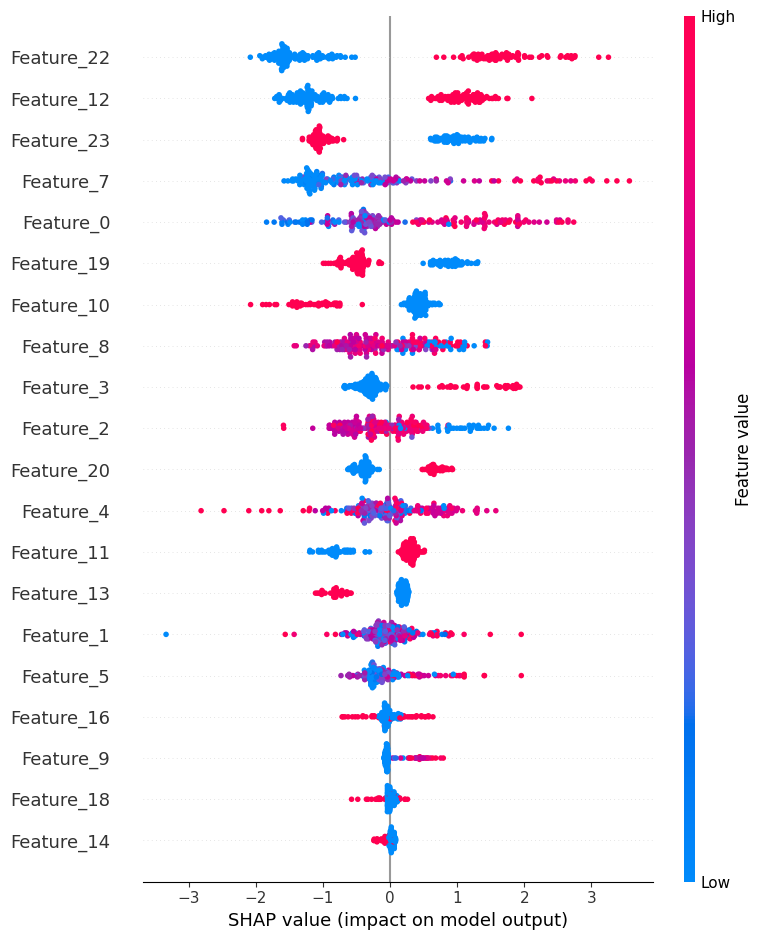

In [17]:
shap.summary_plot(shap_values.values, X)

columns = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "AgeBin", "HighCholesterol", "StressScore", "BPxChol", "FBSxOldpeak"]

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope','AgeBin']

Insight

X-axis: SHAP value → how much a feature changes the prediction.

Values > 0 push the prediction higher (toward class 1 in classification).

Values < 0 push the prediction lower (toward class 0).

Color: Feature value

Red = high value of the feature

Blue = low value of the feature

Y-axis: Sorted by importance (top = most important feature)

1. Feature_22, Feature_12, Feature_23 (Most impactful)
Strongly separate red (high) and blue (low) values across the x-axis.

Feature_22 & 12:

High values → increase prediction (right side, red dots).

Low values → decrease prediction (left side, blue dots).

These features are highly predictive and behave monotonically (i.e., consistent direction of effect).

2. Feature_7 and Feature_0
High values increase prediction (red dots spread to the right).

Wide SHAP value spread → high interaction with model output.

Still among the top 5 features.

3. Feature_19 and Feature_10
Feature_19: Strong nonlinear behavior — high values (red) both push up and down → possibly needs further feature engineering.

Feature_10: Opposite of Feature_22 — low values increase prediction (blue dots on the right).

4. Feature_8, Feature_3, Feature_2
Moderate effect — both high and low values can push prediction in either direction.

Feature_8: Dense clustering near 0 — could indicate saturation or weaker signal.